# _The Office_ IMDB Rating Analysis

Note: To access interactive data visualizations related to this data project, please visit __[this webpage](https://saravalente.github.io/The-Office-Data-Visualization)__ via *desktop* for best results.

## Introduction

Despite having concluded over a decade ago, _The Office_ prevails even today, __[brightening up tracks on Grammy award-winning albums](https://www.rollingstone.com/music/music-features/billie-eilish-the-office-815272/)__, __[integrating seamlessly into modern meme culture](https://time.com/5763852/best-the-office-memes/)__, and __[compelling consumers to sign up for yet another streaming service subscription](https://www.theringer.com/tv/2021/1/4/22212198/peacock-the-office-paywall-streaming-wars-strategy)__.

The cultural impact of _The Office_ is undeniable and ever-evolving. But why?

That is, what makes _The Office_ so great? What factors make our favorite episodes stand out among the rest? 

***

## Data Source

In this notebook, we'll explore these questions by analyzing __[this Kaggle dataset](https://www.kaggle.com/datasets/kapastor/the-office-imdb-ratings-per-episode)__ which contains information about each episode of _The Office_, including IMDB rating, writing and directing credits, and more.

Since, for the purposes of this analysis, the quality of an episode of _The Office_ is defined by its IMDB rating, we must first understand what this rating comprises. A description of this rating metric can be found on __[the IMDB website](https://help.imdb.com/article/imdb/track-movies-tv/ratings-faq/G67Y87TFYYP6TWAV#)__:

>What are IMDb ratings?
>
>IMDb registered users can cast a vote (from 1 to 10) on every released title in the database. Individual votes are then aggregated and summarized as a single IMDb rating, visible on the title's main page.
> 
>Users can update their votes as often as they'd like, but any new vote on the same title will overwrite the previous one, so it is one vote per title per user.

***

## Asking Questions

Based on this dataset, we'll look to answer the following questions:

1. Which season of _The Office_ received the highest average rating?


2. Which writers were associated with the highest rated episodes?


3. Are episodes with more writers more highly rated than episodes with single writers?


4. Which directors were associated with the highest rated episodes?


5. Which characters (mentioned in the episode description) are associated with higher ratings?


In [1]:
# Import libraries
%matplotlib inline
import pandas as pd
import numpy as np
import os
import glob
import matplotlib.pyplot as plt

# Read in data
df = pd.read_csv('./data/raw_data/the-office-imdb.csv')

# View sample of data
df.head(3)

Season          Title     AirDate  Rating  Num_Votes  \
0       1          Pilot  2005-03-24     7.5       4349   
1       1  Diversity Day  2005-03-29     8.3       4213   
2       1    Health Care  2005-04-05     7.8       3536   

                                         Description       DirectedBy  \
0  The premiere episode introduces the boss and s...       Ken Kwapis   
1  Michael's off color remark puts a sensitivity ...       Ken Kwapis   
2  Michael leaves Dwight in charge of picking the...  Ken Whittingham   

                                          WrittenBy  
0  Ricky Gervais |Stephen Merchant and Greg Daniels  
1                                       B. J. Novak  
2                                  Paul Lieberstein

In [2]:
# Rename the columns for simplicity & readability
df.columns=['season', 'title', 'airdate', 'rating', 'votes', 'description', 'directors', 'writers']

# Get information about dataset, including any missing value counts
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188 entries, 0 to 187
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   season       188 non-null    int64  
 1   title        188 non-null    object 
 2   airdate      188 non-null    object 
 3   rating       188 non-null    float64
 4   votes        188 non-null    int64  
 5   description  188 non-null    object 
 6   directors    188 non-null    object 
 7   writers      188 non-null    object 
dtypes: float64(1), int64(2), object(5)
memory usage: 11.9+ KB


In [3]:
# Get basic stats about numeric columns (excluding season column)
df.iloc[:,1:].describe()

rating        votes
count  188.000000   188.000000
mean     8.248404  2489.787234
std      0.578720   924.986433
min      6.600000  1630.000000
25%      7.800000  1918.000000
50%      8.200000  2295.000000
75%      8.600000  2769.000000
max      9.800000  9269.000000

The episode ratings range from 6.6 to 9.8, with an average rating of ~8.25.

The number of votes range from 1,630 to 9,269, with an average number of ~2,490 votes. It's interesting to note that the episode that received the maximum number of votes (9,269) fell <b>well above</b> the 75th percentile of 2,769 votes.

***

## Q1: Which season of _The Office_ received the highest average rating?

Now, we'll find the average rating for each season and rank them.

In [4]:
# Group by season and calculate mean rating for each
df.groupby(['season'])[['rating']].mean().sort_values('rating', ascending=False).reset_index()

season    rating
0       3  8.600000
1       4  8.564286
2       5  8.496154
3       2  8.450000
4       7  8.320833
5       6  8.203846
6       1  7.983333
7       9  7.921739
8       8  7.629167

#### Season 3 had the highest average rating, and season 8 had the lowest average rating.

#### Ratings for the show were highest in general during the middle seasons (2-7).

***

## Q2: Which writers were associated with the highest rated episodes?

Since the writers column is formatted as lists with inconsistent separation (alternating between '|' & 'and'), we'll first transform that column's contents into comma separated lists.

In [5]:
# Convert writers column to comma-separated lists
df['writers'] = df['writers'].apply(lambda x : x.replace(' | ', ',').replace(' |', ',').replace(' and ', ',').split(','))

df.head(1)

season  title     airdate  rating  votes  \
0       1  Pilot  2005-03-24     7.5   4349   

                                         description   directors  \
0  The premiere episode introduces the boss and s...  Ken Kwapis   

                                           writers  
0  [Ricky Gervais, Stephen Merchant, Greg Daniels]

In [6]:
writers_df = df.explode('writers')
writers_df.head(3)

season  title     airdate  rating  votes  \
0       1  Pilot  2005-03-24     7.5   4349   
0       1  Pilot  2005-03-24     7.5   4349   
0       1  Pilot  2005-03-24     7.5   4349   

                                         description   directors  \
0  The premiere episode introduces the boss and s...  Ken Kwapis   
0  The premiere episode introduces the boss and s...  Ken Kwapis   
0  The premiere episode introduces the boss and s...  Ken Kwapis   

            writers  
0     Ricky Gervais  
0  Stephen Merchant  
0      Greg Daniels

In [7]:
# Get top 10 writers
writers_df['writers'].value_counts().head(10)

Mindy Kaling        22
Paul Lieberstein    16
B. J. Novak         15
Gene Stupnitsky     15
Lee Eisenberg       15
Greg Daniels        13
Justin Spitzer      11
Jennifer Celotta    11
Brent Forrester     11
Michael Schur       10
Name: writers, dtype: int64

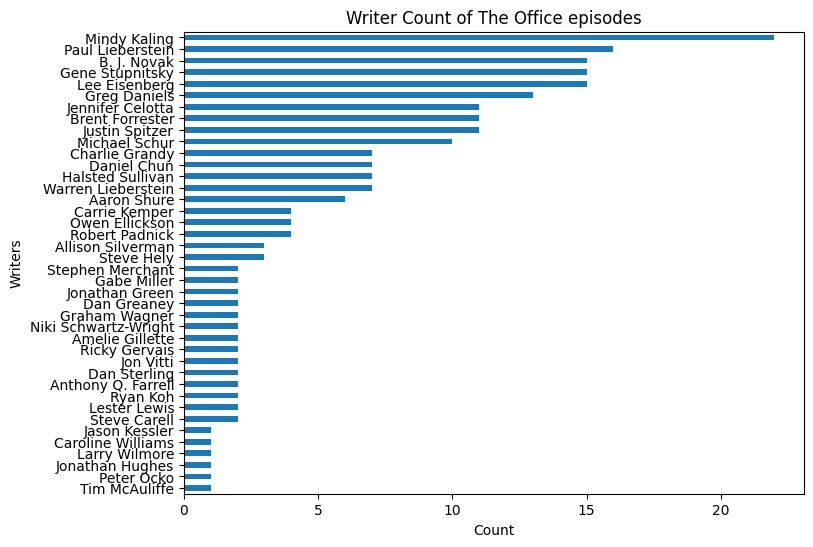

In [8]:
plt.figure(figsize=[8,6])
writers_df['writers'].value_counts().sort_values().plot.barh()
plt.title("Writer Count of The Office episodes")
plt.ylabel("Writers")
plt.xlabel("Count");

In [9]:
writers_df.groupby('writers')[['rating', 'votes']].mean().sort_values('rating', ascending=False).reset_index()

writers    rating        votes
0           Steve Carell  8.800000  3327.000000
1           Greg Daniels  8.784615  3976.000000
2          Michael Schur  8.630000  2976.700000
3           Lester Lewis  8.600000  2472.500000
4       Paul Lieberstein  8.562500  2973.187500
5              Jon Vitti  8.550000  2570.500000
6       Jennifer Celotta  8.527273  2680.545455
7               Ryan Koh  8.500000  2288.500000
8        Gene Stupnitsky  8.480000  2705.800000
9          Lee Eisenberg  8.480000  2705.800000
10          Mindy Kaling  8.440909  2559.772727
11       Brent Forrester  8.372727  2427.363636
12           B. J. Novak  8.360000  2711.533333
13  Niki Schwartz-Wright  8.300000  2079.500000
14        Justin Spitzer  8.272727  2222.636364
15     Caroline Williams  8.200000  2641.000000
16         Larry Wilmore  8.200000  2828.000000
17    Anthony Q. Farrell  8.200000  2225.500000
18           Daniel Chun  8.171429  2022.857143
19      Halsted Sullivan  8.114286  1939.142857
20    Warren Lieberstein  8.114286  1939.142857
21         Tim McAuliffe  8.000000  1691.000000
22         Graham Wagner  7.950000  1766.000000
23           Aaron Shure  7.916667  1994.666667
24         Ricky Gervais  7.900000  3560.500000
25      Stephen Merchant  7.900000  3560.500000
26        Charlie Grandy  7.885714  2144.571429
27        Robert Padnick  7.850000  1874.250000
28          Dan Sterling  7.850000  1731.500000
29           Dan Greaney  7.800000  1754.500000
30         Carrie Kemper  7.775000  1773.750000
31       Jonathan Hughes  7.700000  1922.000000
32           Gabe Miller  7.700000  1733.000000
33        Jonathan Green  7.700000  1733.000000
34       Amelie Gillette  7.600000  1771.500000
35            Steve Hely  7.566667  1795.000000
36        Owen Ellickson  7.400000  1750.500000
37            Peter Ocko  7.400000  1966.000000
38     Allison Silverman  7.400000  1739.333333
39         Jason Kessler  6.800000  2665.000000

#### Steve Carell has the highest average rating of all writers. Greg Daniels, Michael Schur, Paul Lieberstein, Jennifer Celotta, Gene Stupnitsky, and Lee Eisenberg all ranked in the top 10 for number of episodes written _and_ the top 10 for highest rated episodes as writers.

***

## Q3: Are episodes with more writers more highly rated on average than episodes with single writers?

Since we've already converted the values of our "writers" column into comma-separated lists, we can simply find the length of each list and append that number as an additional column.

In [10]:
df['number_of_writers'] = df['writers'].str.len()

# Examine dataframe
df.head(3)

season          title     airdate  rating  votes  \
0       1          Pilot  2005-03-24     7.5   4349   
1       1  Diversity Day  2005-03-29     8.3   4213   
2       1    Health Care  2005-04-05     7.8   3536   

                                         description        directors  \
0  The premiere episode introduces the boss and s...       Ken Kwapis   
1  Michael's off color remark puts a sensitivity ...       Ken Kwapis   
2  Michael leaves Dwight in charge of picking the...  Ken Whittingham   

                                           writers  number_of_writers  
0  [Ricky Gervais, Stephen Merchant, Greg Daniels]                  3  
1                                    [B. J. Novak]                  1  
2                               [Paul Lieberstein]                  1

In [11]:
df.groupby('number_of_writers')[['rating', 'votes']].mean().sort_values('rating', ascending=False).reset_index()

number_of_writers    rating        votes
0                  2  8.480645  2560.387097
1                  3  8.300000  3286.333333
2                  1  8.200649  2460.058442

#### Episodes with 2 writers had the highest average rating at ~8.5, while episodes written by individuals had the lowest average rating at about 8.2. Episodes with 3 writers ranked in the middle of the pack on average.

***

## Q4: Which directors were associated with the highest rated episodes?

In a similar fashion, we'll determine which directors were associated with higher rated episodes.

In [12]:
# Get top 10 directors
df['directors'].value_counts().head(10)

Randall Einhorn      15
Paul Feig            15
Ken Kwapis           13
Greg Daniels         13
Jeffrey Blitz        11
David Rogers          9
Ken Whittingham       9
Charles McDougall     8
Matt Sohn             8
Paul Lieberstein      7
Name: directors, dtype: int64

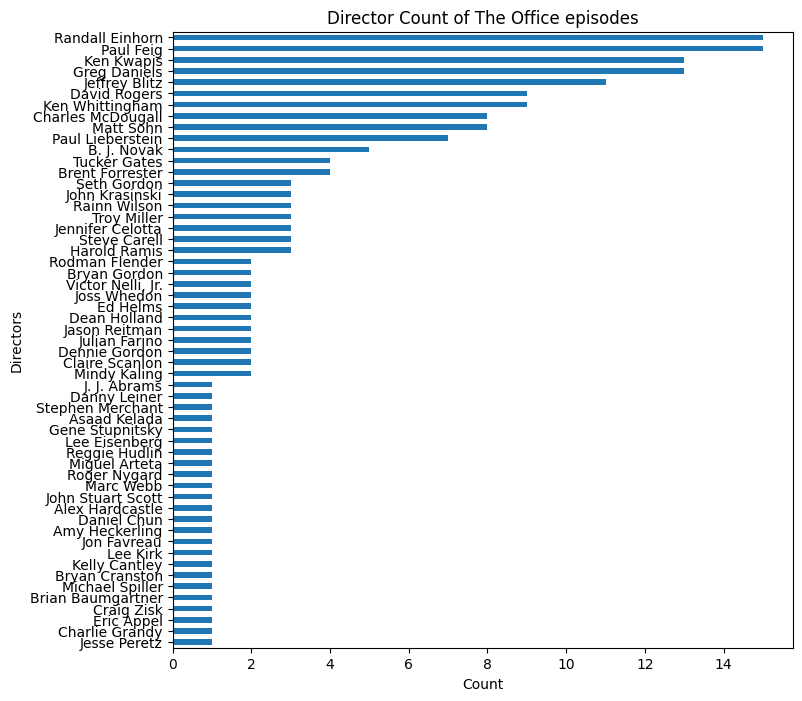

In [13]:
plt.figure(figsize=[8,8])
df['directors'].value_counts().sort_values().plot.barh()
plt.title("Director Count of The Office episodes")
plt.ylabel("Directors")
plt.xlabel("Count");

In [14]:
df.groupby('directors')[['rating', 'votes']].mean().sort_values('rating', ascending=False).head(10)

rating        votes
directors                             
Harold Ramis     8.900000  2977.666667
Steve Carell     8.800000  2683.333333
Paul Feig        8.746667  3212.000000
Joss Whedon      8.700000  2786.500000
Jason Reitman    8.700000  2607.000000
Gene Stupnitsky  8.700000  2391.000000
Tucker Gates     8.650000  2992.000000
Ken Kwapis       8.623077  3728.769231
Julian Farino    8.600000  2598.500000
Lee Eisenberg    8.600000  2262.000000

#### Harold Ramis, Steve Carell, and Paul Feig directed the episodes with the highest ratings.

***

## Q5: Which characters (mentioned in the episode description) are associated with higher-rated episodes?

The "description" column of our data provides information about the content of an episode. This column often mentions particular characters whose presence contributes to the plot of an episode to a significant degree. 

See the below cell for an example:

In [16]:
# Change settings so we can view full description string
pd.set_option("max_colwidth", None)

df['description'].sample()

114    Michael becomes convinced that Donna is having an affair and puts Dwight on the case, but Pam soon discovers that the suspicions may be true. Meanwhile, Darryl gets revenge on Andy for an earlier incident.
Name: description, dtype: object

Since this task requires natural language processing, we'll need to import some additional tools and define helper functions. 

In [15]:
import nltk
import re

# Helper function that removes punctuation and whitespace from strings
def clean_text(text):
    text = re.sub(r"[-]", '', text) # match punctuation marks listed and remove
    text = re.sub(r"['’]s\b", '', text) # match 's or `s and remove
    text = re.sub(r"\/", " ", text) # match slashes then replace them by a single whitespace
    text = re.sub(r"\n", " ", text) # match all literal Line Feed (New line) pattern then replace them by a single whitespace
    text = re.sub(r"\xa0", " ", text) # match all literal non-breakable space pattern then replace them by a single whitespace
    text = re.sub('\s+', ' ', text) # match all one or more whitespace then replace them by a single whitespace
    text = re.sub(r"[;,.?!:`'\"]", '', text) # match punctuation marks listed and replace them with a single whitespace
    text = text.strip(' ') # strip leading and trailing whitespace 
    return text

# Helper function that first runs the above function and then filters each proper noun out (using nltk part-of-speech tagging functionality)
def get_proper_nouns(s):
    clean_str = clean_text(s)
    tagged_str = nltk.tag.pos_tag(clean_str.split())
    proper_nouns = [word for word, tag in tagged_str if tag == 'NNP' or tag == 'NNPS']
    joined_proper_nouns = ' '.join(proper_nouns)
    return joined_proper_nouns

In [16]:
# Make copy of original dataframe and drop irrelevant columns
proper_nouns_df = df.copy()
proper_nouns_df.drop(['directors', 'writers', 'number_of_writers'], axis=1, inplace=True)

proper_nouns_df

season             title     airdate  rating  votes  \
0         1             Pilot  2005-03-24     7.5   4349   
1         1     Diversity Day  2005-03-29     8.3   4213   
2         1       Health Care  2005-04-05     7.8   3536   
3         1      The Alliance  2005-04-12     8.1   3428   
4         1        Basketball  2005-04-19     8.4   3745   
..      ...               ...         ...     ...    ...   
183       9     Stairmageddon  2013-04-11     8.0   1743   
184       9    Paper Airplane  2013-04-25     8.0   1748   
185       9  Livin' the Dream  2013-05-02     9.0   2439   
186       9          A.A.R.M.  2013-05-09     9.5   3401   
187       9            Finale  2013-05-16     9.8   9269   

                                           description  
0    The premiere episode introduces the boss and s...  
1    Michael's off color remark puts a sensitivity ...  
2    Michael leaves Dwight in charge of picking the...  
3    Just for a laugh, Jim agrees to an alliance wi...  
4    Michael and his staff challenge the warehouse ...  
..                                                 ...  
183  Dwight shoots Stanley with a bull tranquilizer...  
184  The employees hold a paper airplane competitio...  
185  Dwight becomes regional manager after Andy qui...  
186  Dwight prepares for a marriage proposal and hi...  
187  One year later, Dunder Mifflin employees past ...  

[188 rows x 6 columns]

In [17]:
# Create proper nouns column using get_proper_nouns function
proper_nouns_df['proper_nouns'] = proper_nouns_df['description'].apply(lambda x:get_proper_nouns(x))

# Transform proper nouns column into list
proper_nouns_df['proper_nouns'] = proper_nouns_df['proper_nouns'].str.split(" ")

# Explode the lists of proper nouns and remove any duplicate rows
proper_nouns_df = proper_nouns_df.explode('proper_nouns')
proper_nouns_df.drop_duplicates(inplace=True)

proper_nouns_df

season     title     airdate  rating  votes  \
0         1     Pilot  2005-03-24     7.5   4349   
0         1     Pilot  2005-03-24     7.5   4349   
0         1     Pilot  2005-03-24     7.5   4349   
0         1     Pilot  2005-03-24     7.5   4349   
0         1     Pilot  2005-03-24     7.5   4349   
..      ...       ...         ...     ...    ...   
186       9  A.A.R.M.  2013-05-09     9.5   3401   
187       9    Finale  2013-05-16     9.8   9269   
187       9    Finale  2013-05-16     9.8   9269   
187       9    Finale  2013-05-16     9.8   9269   
187       9    Finale  2013-05-16     9.8   9269   

                                           description   proper_nouns  
0    The premiere episode introduces the boss and s...  DunderMifflin  
0    The premiere episode introduces the boss and s...          Paper  
0    The premiere episode introduces the boss and s...        Company  
0    The premiere episode introduces the boss and s...       Scranton  
0    The premiere episode introduces the boss and s...   Pennsylvania  
..                                                 ...            ...  
186  Dwight prepares for a marriage proposal and hi...       Scranton  
187  One year later, Dunder Mifflin employees past ...         Dunder  
187  One year later, Dunder Mifflin employees past ...        Mifflin  
187  One year later, Dunder Mifflin employees past ...         Dwight  
187  One year later, Dunder Mifflin employees past ...         Angela  

[954 rows x 7 columns]

In [18]:
# Change settings to view all proper nouns identified in descriptions and their counts
pd.set_option("display.max_rows", None)

proper_nouns_df['proper_nouns'].value_counts()

Michael          128
Dwight            90
Jim               83
Pam               67
Andy              66
Mifflin           38
Dunder            38
Angela            30
Scranton          23
Erin              19
Darryl            18
Jan               16
Holly             15
Robert            13
Ryan              12
Nellie            12
Oscar             10
New               10
Kevin              9
Toby               8
Stanley            7
Wallace            7
David              7
Phyllis            7
York               7
Day                7
Christmas          6
Kelly              6
DunderMifflin      5
Roy                5
Paper              5
Scott              5
Sabre              5
Company            5
California         4
Gabe               4
CEO                4
Back               4
Karen              4
Halloween          4
Valentine          4
Meredith           3
Clark              3
Branch             3
HR                 3
Val                3
Tallahassee        3
Florida      

In [19]:
# Manually create dict to fix name misspellings and associate last names with respective characters for consistency
names_fix_dict = {"Meridith" : 'Meredith', 
        "Phillis" : 'Phyllis', 
        "Daryl": 'Darryl', 
        "Schrute" : 'Dwight', 
        "California": 'Robert', 
        "Scott": 'Michael', 
        "Vickers" : 'Deangelo', 
        "Wallace": 'David', 
        "Todd Packer": 'Packer',
        "LevinsonGould": 'Jan', 
        "Levinson": 'Jan'}

# Rectify inconsistencies in proper_nouns column using the above dict
proper_nouns_df.replace({"proper_nouns": names_fix_dict}, inplace=True)

# Drop any duplicate rows that may have resulted from fixing the inconsistencies above
proper_nouns_df.drop_duplicates(inplace=True)

# Show all unique values in the proper_nouns column
proper_nouns_df['proper_nouns'].unique()

array(['DunderMifflin', 'Paper', 'Company', 'Scranton', 'Pennsylvania',
       'Michael', 'Dwight', 'Jim', 'Dundies', '', 'Halloween', 'Jan',
       'Dunder', 'Mifflin', 'George', 'Foreman', 'Grill', 'Branch',
       'Upset', 'Pam', 'Roy', 'New', 'York', 'Valentine', 'Day',
       'Salesman', 'Take', 'Work', 'Toby', 'Ryan', 'Stanley', 'Volunteer',
       'Sheriff', 'HR', 'Oscar', 'Stamford', 'Philadelphia', 'Movie',
       'Monday', 'Angela', 'Kelly', 'Diwali', 'Hindu', 'Festival',
       'Lights', 'Andy', 'Scanton', 'Karen', 'Christmas', 'Carol',
       'Jamaica', 'Staples', 'Mexican', 'Phyllis', 'Ben', 'Franklin',
       'Casino', 'Night', 'Darryl', 'Meredith', 'Infinity', 'Utica',
       'PingPong', 'Kevin', 'Back', 'Holly', 'Hampshire', 'Cornell',
       'David', 'Winnipeg', 'Nashua', 'City', 'Hilary', 'Swank',
       'birthday', 'Bob', 'Vance', 'Party', 'Planning', 'Committee',
       'Will', 'Friday', 'Buffalo', 'Office', 'Niagara', 'Falls', 'Santa',
       'Sabre', 'CEO', 'Erin'

In [20]:
# Manually create list of characters' names using the above array
names_list = ['Michael', 'Dwight', 'Jim', 'Jan',
       'Pam', 'Roy','Toby', 'Ryan', 'Stanley','Oscar','Angela', 'Kelly',
       'Andy','Karen','Phyllis','Darryl', 'Meredith','Kevin','Holly',
       'David','Erin','Donna','Jo','Gabe','Packer','Deangelo',
        'Robert','Val','Nellie','Clark','Pete']

# Join the names in the above list with the regex "OR" operator to filter out proper nouns not in the names_list
names_regex='|'.join(names_list)

# Make new character_names column, filtering by the above list
proper_nouns_df['character_names'] = proper_nouns_df['proper_nouns'].str.findall(names_regex)

# Ensure character_names column looks correct
proper_nouns_df.head(10)

season          title     airdate  rating  votes  \
0       1          Pilot  2005-03-24     7.5   4349   
0       1          Pilot  2005-03-24     7.5   4349   
0       1          Pilot  2005-03-24     7.5   4349   
0       1          Pilot  2005-03-24     7.5   4349   
0       1          Pilot  2005-03-24     7.5   4349   
1       1  Diversity Day  2005-03-29     8.3   4213   
2       1    Health Care  2005-04-05     7.8   3536   
2       1    Health Care  2005-04-05     7.8   3536   
3       1   The Alliance  2005-04-12     8.1   3428   
3       1   The Alliance  2005-04-12     8.1   3428   

                                         description   proper_nouns  \
0  The premiere episode introduces the boss and s...  DunderMifflin   
0  The premiere episode introduces the boss and s...          Paper   
0  The premiere episode introduces the boss and s...        Company   
0  The premiere episode introduces the boss and s...       Scranton   
0  The premiere episode introduces the boss and s...   Pennsylvania   
1  Michael's off color remark puts a sensitivity ...        Michael   
2  Michael leaves Dwight in charge of picking the...        Michael   
2  Michael leaves Dwight in charge of picking the...         Dwight   
3  Just for a laugh, Jim agrees to an alliance wi...            Jim   
3  Just for a laugh, Jim agrees to an alliance wi...         Dwight   

  character_names  
0              []  
0              []  
0              []  
0              []  
0              []  
1       [Michael]  
2       [Michael]  
2        [Dwight]  
3           [Jim]  
3        [Dwight]

In [21]:
# Transform character_names column values from lists to strings
proper_nouns_df['character_names'] = proper_nouns_df['character_names'].apply(lambda x: str(x).replace('[','').replace(']','').replace('\'', '').replace(' ',''))

# Create NaNs in character_names column if proper_nouns value was not in names list, then drop all rows with NaNs in character_names column
proper_nouns_df['character_names'].replace('', np.nan, inplace=True)
proper_nouns_df.dropna(subset=['character_names'], inplace=True)

# Drop unneeded proper_nouns column
proper_nouns_df.drop(['proper_nouns'], axis=1, inplace=True)

# Finally, take a look at resulting dataframe
proper_nouns_df.head(5)

season          title     airdate  rating  votes  \
1       1  Diversity Day  2005-03-29     8.3   4213   
2       1    Health Care  2005-04-05     7.8   3536   
2       1    Health Care  2005-04-05     7.8   3536   
3       1   The Alliance  2005-04-12     8.1   3428   
3       1   The Alliance  2005-04-12     8.1   3428   

                                         description character_names  
1  Michael's off color remark puts a sensitivity ...         Michael  
2  Michael leaves Dwight in charge of picking the...         Michael  
2  Michael leaves Dwight in charge of picking the...          Dwight  
3  Just for a laugh, Jim agrees to an alliance wi...             Jim  
3  Just for a laugh, Jim agrees to an alliance wi...          Dwight

In [22]:
# Reset default setting for cleanliness
pd.set_option("display.max_rows", 10)

# Count number of times a character is mentioned in a description. (There are no duplicates here for any single episode.)
proper_nouns_df['character_names'].value_counts()

Michael    128
Dwight      90
Jim         83
Pam         67
Andy        66
          ... 
Clark        3
Donna        2
Jo           2
Packer       2
Pete         2
Name: character_names, Length: 31, dtype: int64

In [23]:
# Now, we can calculate the average episode rating for each character's name mentioned in an episode description
proper_nouns_df.groupby('character_names')[['rating']].mean().sort_values('rating', ascending=False).reset_index()

character_names    rating
0         Deangelo  8.833333
1            Karen  8.700000
2              Jan  8.543750
3          Stanley  8.485714
4            Holly  8.440000
..             ...       ...
26          Packer  7.800000
27            Erin  7.789474
28          Robert  7.746154
29           Clark  7.566667
30          Nellie  7.433333

[31 rows x 2 columns]

#### When mentioned in an episode description, Deangelo, Karen, Jan, Stanley, and Holly are associated with higher-rated episodes.

#### Packer, Erin, Robert California, Clark, and Nellie are associated with lower-rated episodes.

***

## Conclusions

### Q1: Which season of _The Office_ received the highest average rating?
> #### Season 3 had the highest average rating, and season 8 had the lowest average rating. Ratings for the show were highest in general during the middle seasons (2-7).

### Q2: Which writers were associated with the highest rated episodes?
> #### Steve Carell has the highest average rating of all writers. He is followed closely behind by Greg Daniels and Michael Schur.

### Q3: Are episodes with more writers more highly rated on average than episodes with single writers?
> #### No. While episodes written by individuals indeed received the lowest rating on average, episodes written in pairs had the highest average rating, and episodes written by trios ranked in the middle.

### Q4: Which directors were associated with the highest rated episodes?
> #### Harold Ramis, Steve Carell, and Paul Feig directed the episodes with the highest ratings.

### Q5: Which characters (mentioned in the episode description) are associated with higher ratings?
> #### Deangelo, Karen, Jan, Stanley, and Holly are associated with the highest average ratings when their names were mentioned in an episode's description.

In conclusion, higher average episode ratings appear to be correlated with middle seasons of _The Office_. Certain writers and directors were correlated with higher ratings on average, as well, (like Steve Carell and Harold Ramis) though having more writers contribute to an episode does not correlate with higher ratings on average. Finally, the mention of certain characters in episode descriptions&mdash;Deangelo, Karen, and Jan, for instance&mdash;correlates with higher average IMDB ratings.

### Limitations

1. There were multiple writers for certain episodes, so for our writer analysis, we split the writer groups such that each row contains only one writer for each episode.
2. Episode descriptions do not always reference key characters by name (i.e. in the first episode of the series, Michael is referenced as "the boss").

### Reference
1. https://www.rollingstone.com/music/music-features/billie-eilish-the-office-815272/
2. https://time.com/5763852/best-the-office-memes/
3. https://www.theringer.com/tv/2021/1/4/22212198/peacock-the-office-paywall-streaming-wars-strategy
4. https://help.imdb.com/article/imdb/track-movies-tv/ratings-faq/G67Y87TFYYP6TWAV#